<a href="https://colab.research.google.com/github/gaurab2455/CNN-Basic/blob/master/Fashion_MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

In [0]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/fashion-mnist_test.csv')

In [19]:
print(data.shape, type(data))
print(data.head(n=5))

(10000, 785) <class 'pandas.core.frame.DataFrame'>
   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...        31         0         0         0
3      2       0       0       0  ...       222        56         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [20]:
X = data.values
print(type(X))

<class 'numpy.ndarray'>


In [21]:
Y = X[:,0]
X = X[:,1:]
X = X/255.0
print(Y.shape,X.shape)

(10000,) (10000, 784)


In [22]:
X = X.reshape((-1,28,28,1))
Y = np_utils.to_categorical(Y) # Changes y value to one hot encoding format
print(Y.shape, X.shape)

(10000, 10) (10000, 28, 28, 1)


### CNN Model

In [0]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation = 'relu', input_shape = (28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [28]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [0]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ["accuracy"])

In [30]:
hist = model.fit(X,Y,shuffle=True,epochs=20,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 30s 4ms/step - loss: 0.9627 - accuracy: 0.6475 - val_loss: 0.6731 - val_accuracy: 0.7570
Epoch 2/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.5706 - accuracy: 0.7894 - val_loss: 0.5672 - val_accuracy: 0.8005
Epoch 3/20
8000/8000 [==============================] - 30s 4ms/step - loss: 0.4712 - accuracy: 0.8304 - val_loss: 0.5128 - val_accuracy: 0.8180
Epoch 4/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.4219 - accuracy: 0.8489 - val_loss: 0.4775 - val_accuracy: 0.8295
Epoch 5/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.3863 - accuracy: 0.8604 - val_loss: 0.4316 - val_accuracy: 0.8415
Epoch 6/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.3417 - accuracy: 0.8771 - val_loss: 0.4029 - val_accuracy: 0.8550
Epoch 7/20
8000/8000 [==============================] - 29s 4ms/step - loss: 0.324

In [31]:
hist.history

{'accuracy': [0.6475,
  0.789375,
  0.830375,
  0.848875,
  0.860375,
  0.877125,
  0.88225,
  0.891625,
  0.8965,
  0.907,
  0.915625,
  0.9155,
  0.9255,
  0.931375,
  0.93275,
  0.9385,
  0.936875,
  0.94725,
  0.952,
  0.958125],
 'loss': [0.9626937338113785,
  0.5705563687086105,
  0.4712449237704277,
  0.4218591693043709,
  0.3862769398093224,
  0.3417436058521271,
  0.32453099893033505,
  0.29554308371245863,
  0.2779408832490444,
  0.2607425234019756,
  0.2358519714474678,
  0.2239994470179081,
  0.20300074625760317,
  0.1925374398380518,
  0.18144096958637237,
  0.16445108141750098,
  0.15739799861609935,
  0.145541962236166,
  0.12968965443596245,
  0.11995461586304008],
 'val_accuracy': [0.7570000290870667,
  0.8004999756813049,
  0.8180000185966492,
  0.8295000195503235,
  0.8414999842643738,
  0.8550000190734863,
  0.8529999852180481,
  0.8510000109672546,
  0.8610000014305115,
  0.875,
  0.8765000104904175,
  0.878000020980835,
  0.8659999966621399,
  0.862500011920929,
 

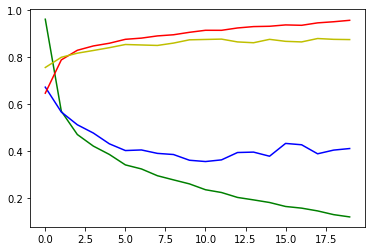

In [33]:
plt.figure()
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'y')
plt.show()